In [1]:
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = snb.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
data.loc[2:5,['species','sepal_width']]

,species,sepal_width
2,setosa,3.2
3,setosa,3.1
4,setosa,3.6
5,setosa,3.9


In [6]:
data.loc[data['species'] == 'setosa',['species']]['species'].unique()

array(['setosa'], dtype=object)

In [7]:
setosa_data = data[data['species'] == 'setosa']
setosa_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# matplotlib

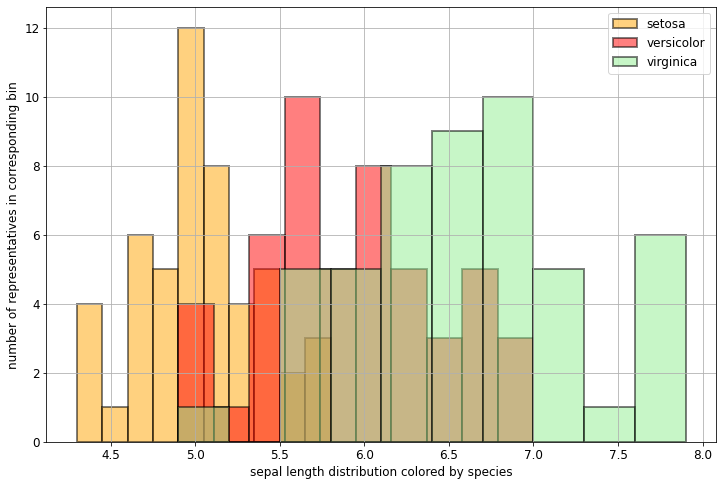

In [8]:
figure = plt.figure(figsize=(12,8))

plt.rcParams['font.size'] = 12
plt.hist(data[data['species'] == 'setosa']['sepal_length'], bins=10,color='orange', edgecolor='black', linewidth=2, alpha=0.5, label='setosa')
plt.hist(data[data['species'] == 'versicolor']['sepal_length'], bins=10,color='red', edgecolor='black', linewidth=2, alpha=0.5, label='versicolor')
plt.hist(data[data['species'] == 'virginica']['sepal_length'], bins=10,color='lightgreen', edgecolor='black', linewidth=2, alpha=0.5, label='virginica')
plt.xlabel('sepal length distribution colored by species')
plt.ylabel('number of representatives in corresponding bin')
plt.legend()
plt.grid()
plt.show()

In [9]:
#plt.rcParams.keys()

# altair

In [10]:
import altair as alt

In [11]:
alt.Chart(data).mark_boxplot(

).encode(
    alt.X('species:N'),
    alt.Y('sepal_length:Q')
).properties(
    width=500,
    height=200
)

alt.Chart(...)

In [12]:
selection = alt.selection_multi(fields=['species'], bind='legend')

alt.Chart(data).mark_bar().encode(
    alt.X("sepal_length:Q", bin=alt.Bin(10)),
    alt.Y('count()'),
    alt.Color('species:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

alt.Chart(...)

In [13]:
dataframes = []
for species in data['species'].unique():
    dataframes.append(data[data['species'] == species])

In [14]:
len(dataframes)

3

In [15]:
len(data)

150

In [16]:
for df in dataframes:
    print("[*] length of {} dataframe : {}"
          .format(str(df['species'].unique()[0]),len(df)))

[*] length of setosa dataframe : 50
[*] length of versicolor dataframe : 50
[*] length of virginica dataframe : 50


# one sample ttest
$ t = \frac{\overline{x} - \mu}{\frac{s}{\sqrt{\eta}}}$

In [17]:
difference = np.array(dataframes[2]['sepal_length']) - np.array(dataframes[2]['sepal_length'])
if sum(difference) != 0:
    t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))
else:
    t = 0
s = np.random.standard_t(len(difference),size=10000)
p = np.sum(s<t)/float(len(s))
print("[*] There is a {} % probability that the paired samples stem from distributions with the same means.".format(2 * min(p, 1 - p) * 100))

[*] There is a 99.88 % probability that the paired samples stem from distributions with the same means.
